<a href="https://colab.research.google.com/github/sagsshakya/Sparks-Foundation/blob/main/Data%20Science/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sparks Foundation GRIP: Task 1
### Problem Statement:
- Predict the percentage of an student based on the no. of study hours.

# Prepared By: Sagun Shakya
#### Email: sags.shakya@gmail.com
#### Github: https://github.com/sagsshakya/Sparks-Foundation
#### LinkedIn: https://www.linkedin.com/in/sagsshakya/

## Importing the necssary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Data Source.
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [ ]:
df = pd.read_csv(url)
print(df.shape)
print(df.columns)

(25, 2)
Index(['Hours', 'Scores'], dtype='object')


In [ ]:
x = df['Hours'].values      # Independent Feature.
y = df['Scores'].values     # Dependent Feature.
print(x)
print(y)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Visualization.

In [ ]:
# Measuring skewness of the variables.
from scipy.stats import skew

x_skew = round(skew(x), 3)
y_skew = round(skew(y), 3)

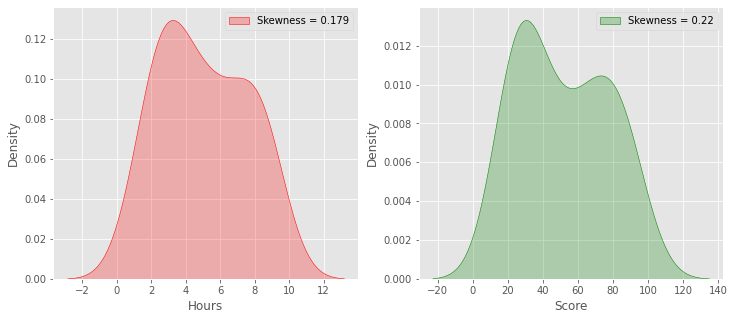

In [ ]:
# Checking for normality and skewness.
plt.figure(figsize=(12,5))
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.kdeplot(x, shade=True, color = 'red', label = 'Skewness = ' + str(x_skew))
plt.xlabel('Hours')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('Score')
sns.kdeplot(y, shade=True, color = 'green', label = 'Skewness = ' + str(y_skew))
plt.legend()

plt.show()

***Approximately Normally Distrbuted.***

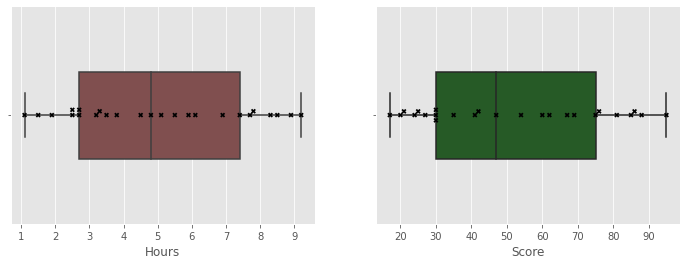

In [ ]:
# Checking for normality and skewness.
plt.figure(figsize=(12,4))
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.boxplot(x, color = 'brown', width = .4, saturation=.4)
sns.swarmplot(x, marker = 'X', color = 'black')
plt.xlabel('Hours')

plt.subplot(1,2,2)
plt.xlabel('Score')
sns.boxplot(y, color = 'green', width = .4, saturation=.4)
sns.swarmplot(y, marker = 'X', color = 'black')

plt.show()

***No Potential Outliers.***

## Visualization using scatter plot.

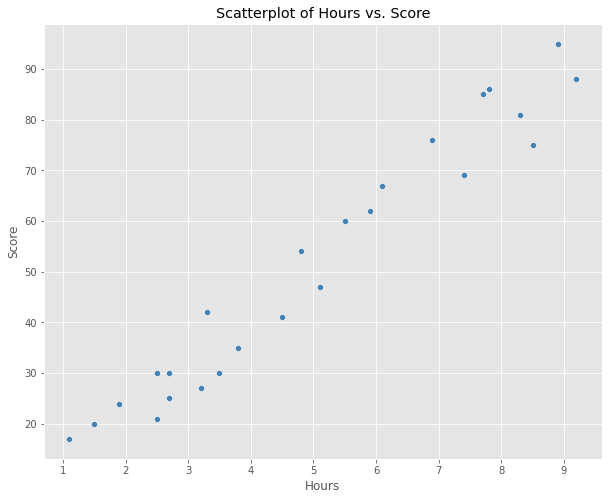

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use('ggplot')

sns.scatterplot(x, y, color = 'steelblue')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Scatterplot of Hours vs. Score')
plt.show()

**We can fit a straight line.**

# Using Linear Regression.

In [ ]:
# We fit a straight line to the above data.
from sklearn.linear_model import LinearRegression as LR
linear_model = LR()
linear_model.fit(x.reshape(-1,1),y.reshape(-1,1))

# Making Predictions.
y_pred = linear_model.predict(x.reshape(-1,1))

# Intercept and Weight(Slope).
C = round(linear_model.intercept_[0], 3)
W = round(linear_model.coef_[0][0], 3)

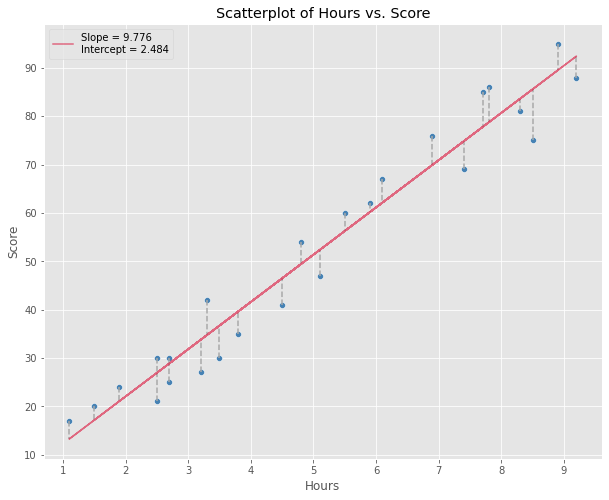

In [ ]:
# Visualization.
plt.figure(figsize=(10,8))

label = 'Slope = ' + str(W) + '\nIntercept = ' + str(C)
plt.plot(x, y_pred, color = 'crimson', alpha = .6, label = label)
sns.scatterplot(x, y, color = 'steelblue')

for ii in range(len(x)):
    plt.vlines(x[ii], y[ii], y_pred[ii], linestyles='dashed', color = 'darkgray')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Scatterplot of Hours vs. Score')

plt.legend()
plt.show()

## Model Performance Evaluation.

### Error Analysis.

In [ ]:
# Checking the error and how well we have fitted the data.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def error_summary(X_train, Y_train, model):
  X_train = X_train.reshape(-1,1)
  print('Error on Training set: \n')
  print('Mean Squared Error: ', round(mean_squared_error(Y_train, model.predict(X_train)), 3))
  print('Root Mean Squared Error: ', round((mean_squared_error(Y_train, model.predict(X_train)))**.5, 3)) 
  print('Mean Absolute Error: ', round(mean_absolute_error(Y_train, model.predict(X_train)), 3))
  print('R2 Score: ', round(r2_score(Y_train, model.predict(X_train)), 3))

In [ ]:
error_summary(x,y, model = linear_model)

Error on Training set: 

Mean Squared Error:  28.883
Root Mean Squared Error:  5.374
Mean Absolute Error:  4.973
R2 Score:  0.953


### Residuals vs. Target Feature.

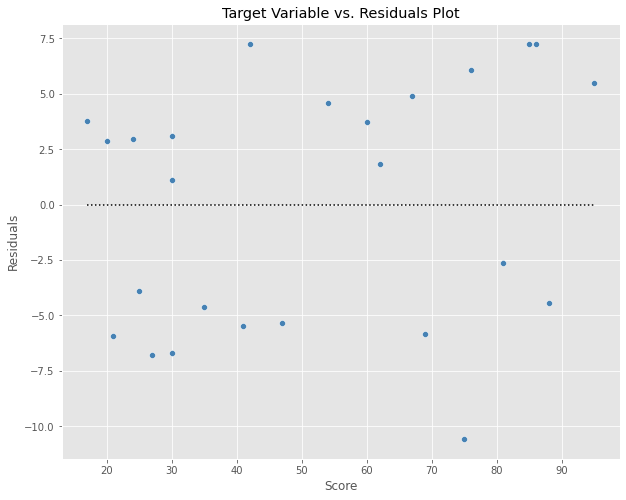

In [ ]:
# Defining the residual.
res = y - y_pred.ravel()

plt.figure(figsize=(10,8))
sns.scatterplot(y, res, color = 'steelblue')
plt.hlines(0, y.min(), y.max(), linestyles = 'dotted')

plt.xlabel('Score')
plt.ylabel('Residuals')
plt.title('Target Variable vs. Residuals Plot')
plt.show()

**The residuals are evenly distributed across the X - axis.**

### Preicted Variable vs. Residuals.

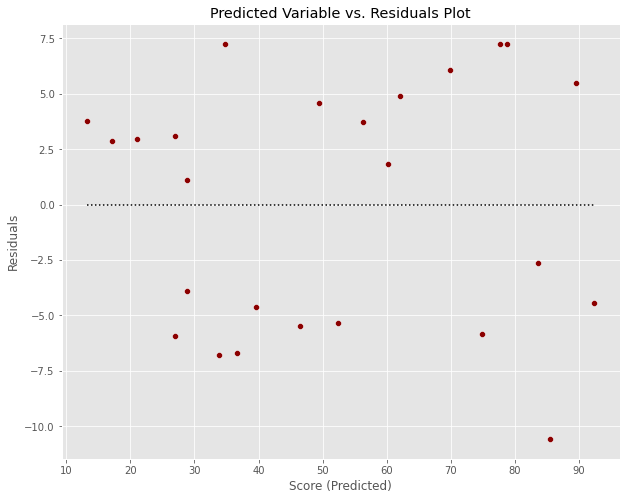

In [ ]:
# Defining the residual.
y_pred = y_pred.ravel()
res = y - y_pred

plt.figure(figsize=(10,8))
sns.scatterplot(y_pred, res, color = 'darkred')
plt.hlines(0, y_pred.min(), y_pred.max(), linestyles = 'dotted')

plt.xlabel('Score (Predicted)')
plt.ylabel('Residuals')
plt.title('Predicted Variable vs. Residuals Plot')
plt.show()

# Prediction using unknown value.
### What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
x_new = np.array([9.25])
y_new_pred = linear_model.predict(x_new.reshape(-1,1))
print('Studing ' + str(x_new[0]) + ' hours a day, the student will get ' + str(round(y_new_pred[0][0], 2)) + ' score.')

Studing 9.25 hours a day, the student will get 92.91 score.
